In [1]:
import pandas as pd
from time import time
from helper import *
from models import *
from cleaning import *

Reading twitter - 1grams ...
Reading twitter - 2grams ...


/opt/anaconda3/lib/python3.8/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [2]:
pos_train , neg_train = load_data()
pos_train = pos_train.iloc[:2000]
neg_train = neg_train.iloc[:2000]
X_train, X_test, y_train, y_test = split_data(pos_train, neg_train) #return pandas series

Train_set Info: SIZE= 3200, POSITIVE Tweets =49.28%, NEGATIVE Tweets = 50.72%
Test_set Info: SIZE= 800, POSITIVE Tweets =52.88%, NEGATIVE Tweets = 47.12%


In [3]:
%%time

#Drop Duplicates
pos_train.drop_duplicates(inplace=True)
neg_train.drop_duplicates(inplace=True)
print('Records of positive tweets left', len(pos_train))
print('Records of negative tweets left', len(neg_train))

Records of positive tweets left 1846
Records of negative tweets left 1820
CPU times: user 7.02 ms, sys: 3.37 ms, total: 10.4 ms
Wall time: 10 ms


In [4]:
%%time
# CELL : avec SVM clean + Train = 15min pour 80.000 train set 
#clean  
X_train_clean= X_train.apply(clean_tweet)
X_test_clean = X_test.apply(clean_tweet)


CPU times: user 3.43 s, sys: 217 ms, total: 3.64 s
Wall time: 3.68 s


LOGISTIC REGRESSION MODEL with TFIDF transformation 
with 26682 features selected 
 
Accuracy: 0.75
              precision    recall  f1-score   support

          -1       0.76      0.67      0.71       377
           1       0.74      0.81      0.77       423

    accuracy                           0.75       800
   macro avg       0.75      0.74      0.74       800
weighted avg       0.75      0.75      0.74       800



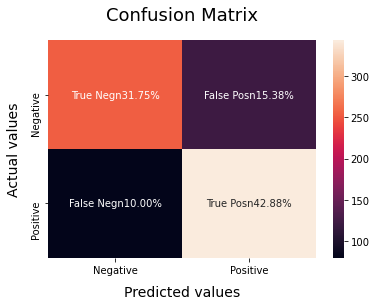

Model: ROC AUC=0.802


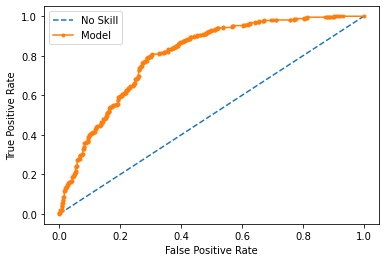

CPU times: user 1.39 s, sys: 53.9 ms, total: 1.44 s
Wall time: 560 ms


In [5]:
%%time
#train
logistic_regression_TFIDF(X_train_clean, X_test_clean, y_train, y_test, display_evaluation = True,max_features= 30000 , ngram_range=(1,2))
#SVM_TFIDF(X_train_clean, X_test_clean, y_train, y_test, max_features = 40000, ngram_range=(1,2) , display_evaluation = False)
#naive_bayes_count(X_train_clean, X_test_clean, y_train, y_test, max_features = 10000 , ngram_range =(1,2) , display_evaluation= True)
